In [1]:
# 1 Explain how you can implement ML in a real world application

In [31]:

"""
applying machine learning in real-world applications involves many steps including data collection, pre-processing, model selection, training, analysis, and deployment.
let's go through steps for Bangalore housing dataset
example:

1. summary:
the first step is to compile a dataset containing Bangalore housing information this dataset can be accessed from various sources such as real estate websites, government databases, or APIs. but we have dataset available in csv formate

2. EDA:
perform an EDA to understand the structure and quality of the dataset. this includes:

data sets and their types (numeric, categorical) search features.
ensure that missing values ​​are handled properly .
visualization of distributions and correlations using plots (histograms, scatter plots, etc.).
identify outliers and decide how to deal with them.

3. key technologies:
feature engineering involves creating new features or modifying existing features to improve model performance. common methods include:

handling of classification changes (encoding, single hot encoding).
scaling to the same numeric factors (min-max scaling, standardization).
developing new products based on domain knowledge or product interactions.

4. model selection:
select the appropriate machine learning model for the regression task. for the Bangalore building dataset, we can use support vector machine (svm) regression due to its ability to handle non-linear relationships and high-dimensional data.

5. model training:
divide the dataset into training and testing sets. then, use the training data to train the svm regressor. during training, the model learns the relationship between inputs (e.g. field t.).

6. sample analysis:
use the test set to evaluate the performance of the trained model. common evaluation criteria for regression functions include the mean standard error (mae), mean squared error (mse), and r-squared (r^2) scores.

7. resources:
once the model is satisfactorily trained and tested, it can be used in real-world applications. this requires the model to be integrated outside of the application or deployed as a web service/api. users can then input additional housing information, and the model can predict values ​​based on input characteristics.

"""

"\napplying machine learning in real-world applications involves many steps including data collection, pre-processing, model selection, training, analysis, and deployment.\nlet's go through steps for Bangalore housing dataset\nexample:\n\n1. summary:\nthe first step is to compile a dataset containing Bangalore housing information this dataset can be accessed from various sources such as real estate websites, government databases, or APIs. but we have dataset available in csv formate\n\n2. EDA:\nperform an EDA to understand the structure and quality of the dataset. this includes:\n\ndata sets and their types (numeric, categorical) search features.\nensure that missing values \u200b\u200bare handled properly .\nvisualization of distributions and correlations using plots (histograms, scatter plots, etc.).\nidentify outliers and decide how to deal with them.\n\n3. key technologies:\nfeature engineering involves creating new features or modifying existing features to improve model performan

In [3]:
# Train an SVM regressor on : Bengaluru housing dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

data = pd.read_csv("Bengaluru_House_Data.csv")


In [5]:
data.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
10239,Plot Area,Ready To Move,Konanakunte,9 Bedroom,NaN,1590,6.0,1.0,150.0
1195,Plot Area,Ready To Move,Chokkanahalli,1 Bedroom,NaN,1200,1.0,1.0,28.0
334,Super built-up Area,Ready To Move,Ulsoor,3 BHK,K borja,2135,3.0,2.0,215.0
2156,Super built-up Area,Ready To Move,Kaveri Nagar,1 BHK,NaN,750,1.0,2.0,25.0
8781,Built-up Area,Ready To Move,Kadubeesanahalli,3 BHK,NaN,1365,3.0,1.0,80.0
7727,Super built-up Area,Ready To Move,Cubbon Road,4 BHK,NaN,5422,6.0,NaN,1900.0
4655,Plot Area,Ready To Move,Richmond Town,4 Bedroom,NaN,1800,5.0,2.0,500.0
8784,Super built-up Area,19-Oct,Whitefield,2 BHK,SVacyeg,1256,2.0,NaN,73.0
11337,Super built-up Area,Ready To Move,Kaggadasapura,2 BHK,JaaldEm,1175,2.0,2.0,50.0
12498,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1404,2.0,1.0,67.5


In [6]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
data['bath'].fillna(data['bath'].mean(), inplace=True)
data['balcony'].fillna(data['balcony'].mean(), inplace=True)
data['size'].fillna(data['size'].mode()[0], inplace=True)
data['location'].fillna(data['location'].mode()[0], inplace=True)
data.drop('society', axis=1, inplace=True) #so many values are missing here 


In [8]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [9]:
print(data.describe())

               bath       balcony         price
count  13320.000000  13320.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.337777      0.798360    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000


In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  object 
 4   total_sqft    13320 non-null  object 
 5   bath          13320 non-null  float64
 6   balcony       13320 non-null  float64
 7   price         13320 non-null  float64
dtypes: float64(3), object(5)
memory usage: 832.6+ KB
None


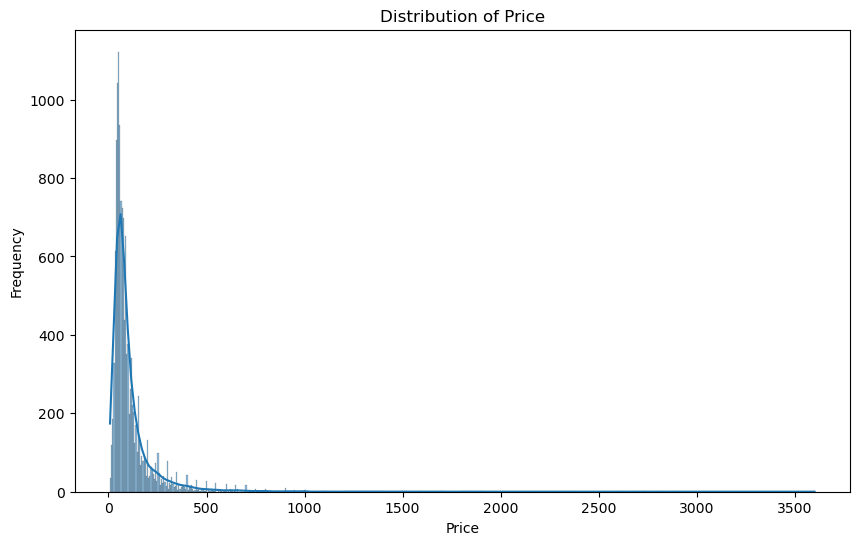

c:\Users\yashd\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


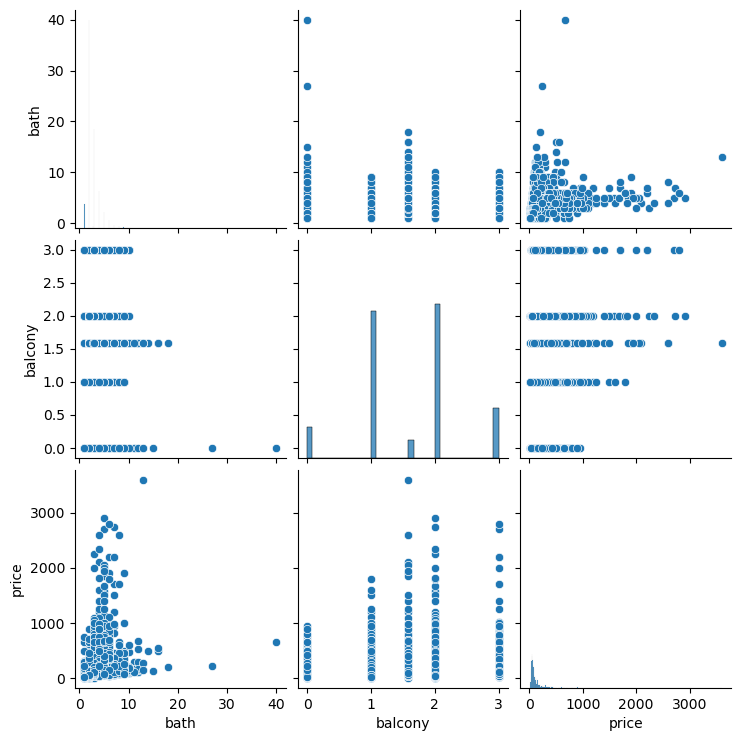

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

sns.pairplot(data[['total_sqft', 'bath', 'balcony', 'price']])
plt.show()

In [12]:
data.duplicated().sum()

568

In [13]:
# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['area_type', 'availability', 'location', 'size'], drop_first=True)


In [15]:
data.drop_duplicates(inplace=True)


In [16]:
data.duplicated().sum()

0

In [28]:

invalid_rows = data[data['total_sqft'].str.contains('Sq. Meter')]
data.drop(invalid_rows.index, inplace=True) 
invalid_rows = data[data['total_sqft'].str.contains('Perch')]
data.drop(invalid_rows.index, inplace=True) 
invalid_rows = data[data['total_sqft'].str.contains('Sq. Yards')]
data.drop(invalid_rows.index, inplace=True) 
invalid_rows = data[data['total_sqft'].str.contains('Acres')]
data.drop(invalid_rows.index, inplace=True) 
invalid_rows = data[data['total_sqft'].str.contains('Grounds')]
data.drop(invalid_rows.index, inplace=True) 
invalid_rows = data[data['total_sqft'].str.contains('Cents')]
data.drop(invalid_rows.index, inplace=True) 
invalid_rows = data[data['total_sqft'].str.contains('Guntha')]
data.drop(invalid_rows.index, inplace=True) 

#Function to convert range values to average
def convert_range_to_avg(value):
    if '-' in value:
        start, end = value.split('-')
        return (float(start) + float(end)) / 2
    else:
        return float(value)

data['total_sqft'] = data['total_sqft'].apply(convert_range_to_avg)


scaler = StandardScaler()
num_cols = ['total_sqft', 'bath', 'balcony']
data[num_cols] = scaler.fit_transform(data[num_cols])

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12706 entries, 0 to 13318
Columns: 1421 entries, total_sqft to size_9 Bedroom
dtypes: bool(1417), float64(4)
memory usage: 17.7 MB


In [30]:
X = data.drop('price', axis=1)
y = data['price']

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_regressor = SVR(kernel='linear')

svm_regressor.fit(X_train, y_train)

y_pred = svm_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 18530.4526826842
